<a href="https://colab.research.google.com/github/MariaBet/tcc-analisedesentimentos-b2w/blob/main/analiseexploratoria_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive') 

In [ ]:
#!pip install numpy

In [ ]:
#!pip install pandas

In [ ]:
import numpy as np

# para gerar dados sintéticos e balancear a variável a ser predita
from imblearn.over_sampling import SMOTE

# para dispor os dados na mesma escala

# modelo de machine learning
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble        import RandomForestClassifier
from sklearn.naive_bayes     import MultinomialNB
from sklearn.ensemble        import GradientBoostingClassifier
from sklearn.linear_model    import LogisticRegression

# para avaliar o modelo
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score


# para salvar artefatos
import pickle



ModuleNotFoundError: No module named 'imblearn'

In [ ]:
import pandas as pd
df = pd.read_csv("b2w_preprocessado3.csv")


In [ ]:
df.head()

,review_comentarios,sentiment,overall_rating
0,Bom Estou contente com a compra entrega rápida...,1,4
1,Preço imbatível ótima qualidade Por apenas Reu...,1,4
2,ATENDE TODAS AS EXPECTATIVA SUPERA EM AGILIDAD...,1,4
3,presente mais que desejado MEU FILHO AMOU PARE...,1,4
4,Sem duvidas excelente A entrega foi no prazo a...,1,5


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

review = df['review_comentarios']

vect = TfidfVectorizer(ngram_range=(1,4), lowercase=True, use_idf=True, min_df=2, max_df=0.95, max_features=15000)
vect.fit(review)

text_vect = vect.transform(review)

In [ ]:
print(text_vect)

  (0, 14993)	0.1815593494048446
  (0, 14987)	0.15368199870919044
  (0, 14000)	0.2215989494825973
  (0, 13999)	0.20629788880536346
  (0, 13991)	0.1321302170965025
  (0, 13620)	0.08896946329159579
  (0, 12916)	0.08894128182663054
  (0, 12754)	0.09964648074548588
  (0, 10921)	0.040433817088182784
  (0, 10893)	0.17810334575283718
  (0, 10892)	0.13376531111210327
  (0, 10879)	0.17779006945108886
  (0, 10877)	0.11572078910802244
  (0, 9621)	0.22693520770789405
  (0, 9620)	0.21250458961599167
  (0, 9617)	0.11126690856214372
  (0, 5406)	0.2274809289156955
  (0, 5389)	0.0940802989017254
  (0, 5218)	0.17356903122475917
  (0, 5020)	0.12544598397681625
  (0, 4893)	0.07031104493354219
  (0, 4360)	0.0839984128849777
  (0, 4228)	0.05592159339314031
  (0, 4020)	0.1868629659557571
  (0, 4016)	0.16613760463183494
  :	:
  (132372, 8748)	0.11315928984003464
  (132372, 7828)	0.23030889831212664
  (132372, 7824)	0.14373143054387122
  (132372, 7705)	0.18683281429864523
  (132372, 7672)	0.09699290339086435
  

In [ ]:
# Gerar Pandas DataFrame
tfidf = pd.DataFrame(text_vect.toarray(), columns=vect.get_feature_names())

# relatório de dtypes
tfidf.info()

/home/betania.honorio/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132373 entries, 0 to 132372
Columns: 15000 entries, abaixo to útil para
dtypes: float64(15000)
memory usage: 14.8 GB


In [ ]:
tfidf.head()

,abaixo,abaixo do,abea,abeo,abeura,abraço,abre,abri,abri caixa,abril,...,único ponto negativo,único ponto negativo que,único porém,único problema,único problema foi,único problema que,úteis,úteis para,útil,útil para
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.181559,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(vect)

TfidfVectorizer(max_df=0.95, max_features=15000, min_df=2, ngram_range=(1, 4))


In [ ]:
labels = df['sentiment'].values

labels

array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_vect, labels,test_size=0.3, random_state = 42)

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(max_iter = 30000)


LogReg = LogReg.fit(X_train, y_train)


print(LogReg)

#print(np.mean(cross_val_score(LogReg, x_vect, labels, cv=10)))


LogisticRegression(max_iter=30000)


In [ ]:
#lr = LogisticRegression(solver='liblinear')

#scores = cross_val_score(lr, x, y, cv=10, scoring='accuracy')

#print('Acurácia média:', scores.mean())

In [ ]:
y_prediction = LogReg.predict(X_test)

In [ ]:
#!pip install matplotlib

In [ ]:
#!pip install seaborn


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score

import matplotlib.pyplot as plt
#import pip
#pip.main(['install','seaborn'])
import seaborn as sns

def metricas(y_true, y_pred):
     
    print("Acurácia: ", accuracy_score(y_true, y_pred)) 
    print("\nAUROC:", roc_auc_score(y_true, y_pred))
    print("\nF1-Score:", f1_score(y_true, y_pred, average='weighted'))
    print("\nMatriz de confusão:")
    sns.heatmap(confusion_matrix(y_true, y_pred),cmap="Blues", annot=True,annot_kws={"size": 16})
    plt.show()

Acurácia:  0.8956990330378727

AUROC: 0.8881380175222174

F1-Score: 0.8954496692826799

Matriz de confusão:


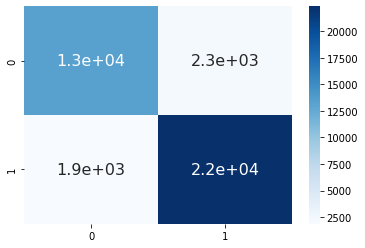

In [ ]:
metricas(y_test, y_prediction)

In [ ]:
def predicao_log(review):
  texto_vetorizado = vect.transform([review])
  pred = LogReg.predict(texto_vetorizado)

  if pred == 0:
    print("Esse comentário é uma review negativa.")
  else:
    print("Esse comentário é uma review positiva.")

In [ ]:
predicao_log("acho que não gostei desse notebook, demorou muito pra chegar e notebook é feio")

Esse comentário é uma review negativa.


In [ ]:
predicao_log('Me Sinto satisfeita com esse produto, o celular é incrivél, adorei e a entrega foi super rádida')

Esse comentário é uma review positiva.


In [ ]:
predicao_log('Bom Estou contente com a compra entrega rápida o único problema com as Americanas é se houver troca ou devolução do produto o consumidor tem problemas com espera')

Esse comentário é uma review negativa.


In [ ]:
predicao_log('Preço imbatível ótima qualidade Por apenas Reu consegui comprar esse lindo copo de acrílico	')

Esse comentário é uma review positiva.


In [ ]:
predicao_log('Revoltado Esse celular não vale nada a bateria não vale nada descarrega sozinha quando estar usando esquenta tanto que faz medo espludi foi a pior compra da minha vida se eu tivesse condições quebrava ele em mil pedaços e comprava outro de qualquer marca menos Motorola	')

Esse comentário é uma review negativa.


In [ ]:
from sklearn.svm import LinearSVC

clf = LinearSVC(C=10, random_state=0)
clf.fit(X_train, y_train)

/home/betania.honorio/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=10, random_state=0)

In [ ]:
y_predictionvlf = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score

import matplotlib.pyplot as plt
#import pip
#pip.main(['install','seaborn'])
import seaborn as sns

def metricas(y_true, y_pred):
     
    print("Acurácia: ", accuracy_score(y_true, y_pred)) 
    print("\nAUROC:", roc_auc_score(y_true, y_pred))
    print("\nF1-Score:", f1_score(y_true, y_pred, average='weighted'))
    print("\nMatriz de confusão:")
    sns.heatmap(confusion_matrix(y_true, y_pred),cmap="Blues", annot=True,annot_kws={"size": 16})
    plt.show()

Acurácia:  0.8634921434327155

AUROC: 0.8558042259997316

F1-Score: 0.863384894121642

Matriz de confusão:


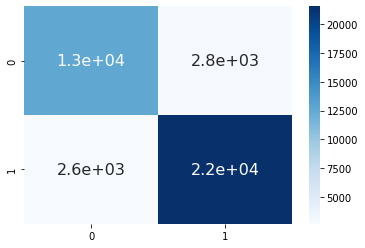

In [ ]:
metricas(y_test, y_predictionvlf)

In [ ]:
def predicao_lsvc(review):
  texto_vetorizado = vect.transform([review])
  pred = clf.predict(texto_vetorizado)

  if pred == 0:
    print("Esse comentário é uma review negativa.")
  else:
    print("Esse comentário é uma review positiva.")

In [ ]:
predicao_lsvc("acho que não gostei desse notebook, demorou muito pra chegar e notebook é feio")

Esse comentário é uma review negativa.


In [ ]:
predicao_lsvc('Me Sinto satisfeita com esse produto, o celular é incrivél, adorei e a entrega foi super rádida')

Esse comentário é uma review positiva.


In [ ]:
predicao_lsvc('Bom Estou contente com a compra entrega rápida o único problema com as Americanas é se houver troca ou devolução do produto o consumidor tem problemas com espera')

Esse comentário é uma review negativa.


In [ ]:
predicao_lsvc('Preço imbatível ótima qualidade Por apenas Reu consegui comprar esse lindo copo de acrílico	')

Esse comentário é uma review positiva.


In [ ]:
predicao_lsvc('	Gostei do produto Produto ofereçe o que prometeu no anúncio entrega muito rapida bem antes do prazo')

Esse comentário é uma review positiva.


In [ ]:
predicao_lsvc('Revoltado Esse celular não vale nada a bateria não vale nada descarrega sozinha quando estar usando esquenta tanto que faz medo espludi foi a pior compra da minha vida')

Esse comentário é uma review negativa.
